In [18]:
import numpy as np
import matplotlib.pyplot as plt


In [28]:
cm = 0.01
kg = 1
deg = np.pi/180

In [15]:
profile = np.loadtxt("profilo_asse_1.csv", delimiter=',', skiprows=1)
profile.shape

(361, 2)

In [29]:
time = profile[:,0]
pos = profile[:,1] * deg
cycle_time = time[-1] - time[0]
dt = time[1] - time[0]

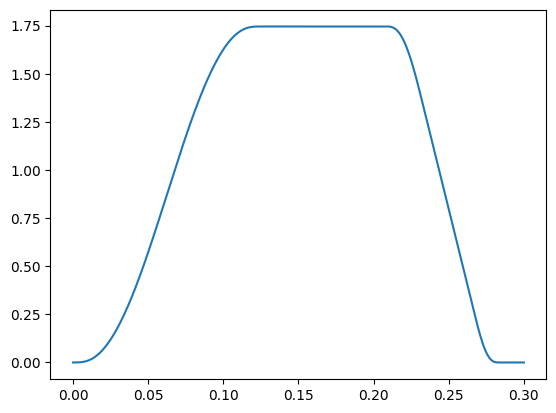

In [30]:
plt.plot(time, pos)

In [50]:
J_load = 0.25
J_mot = 10*kg*cm**2

In [51]:
# C_load = J_load * omega_dot
# C_mot = J_mot * omega_dot * gb_i + C_load / gb_i

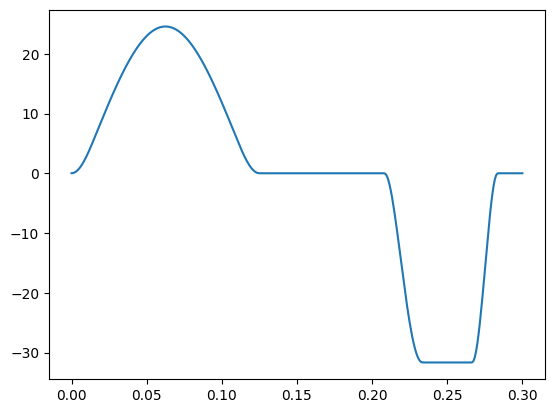

In [52]:
omega = np.gradient(pos, dt)
plt.plot(time, omega)

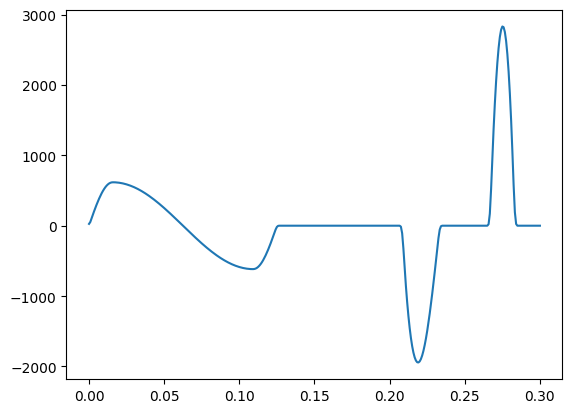

In [53]:
omega_dot = np.gradient(omega, dt)
plt.plot(time, omega_dot)

In [54]:
def C_mot(gb_i):
  C_load = J_load * omega_dot
  C_tot = J_mot * omega_dot * gb_i + C_load / gb_i
  return np.max(C_tot)
C_mot_vect = np.vectorize(C_mot)

Text(0, 0.5, 'motor torque')

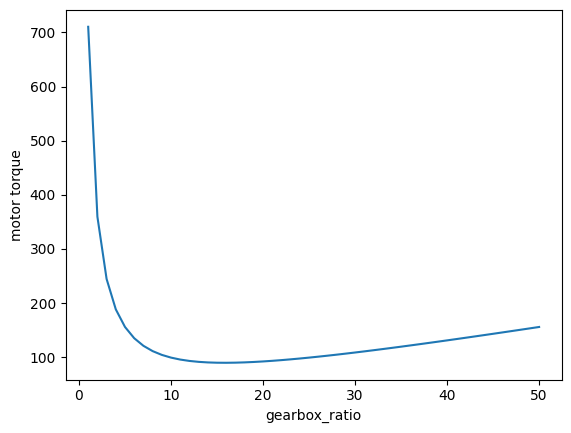

In [59]:
i = np.linspace(1, 50)
C_mot_max = C_mot_vect(i)
plt.plot(i, C_mot_max)
plt.xlabel("gearbox_ratio")
plt.ylabel("motor torque")